In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import tqdm
import numba

%matplotlib inline


In [2]:
@numba.jit
def iou(box_a, box_b):
    """
        box should be a tuple (x, y, width, height)
    
    """
    
    x1, y1, w1, h1 = box_a
    x2, y2, w2, h2 = box_b
    
    if x1+w1 <= x2:
        return 0.0
    if x2+w2 <= x1:
        return 0.0
    if y1+h1 <= y2:
        return 0.0
    if y2+h2 <= y1:
        return 0.0
    
    if (w1<=0.0) or (w2<=0.0) or (h1<=0.0) or (h2<=0.0):
        return None
    
    s1 = w1*h1
    s2 = w2*h2
    
    si = (min(x1+w1,x2+w2)- max(x1,x2)) * (min(y1+h1,y2+h2)- max(y1,y2))
    
    return round(si/(s1+s2-si),6)


In [3]:
def draw_boxes(box_a, box_b):
    """
        box: tuple(x, y, width, height)
    """
    plt.figure(figsize=(4,4))
    plt.xlim(0,100)
    plt.ylim(0,100)
    axes = plt.gca() #plt.gca()
    patch_a = Rectangle((box_a[0], box_a[1]), box_a[2], box_a[3], color='red', alpha=.5)
    axes.add_patch(patch_a)
    patch_b = Rectangle((box_b[0], box_b[1]), box_b[2], box_b[3], color='blue', alpha=.5)
    axes.add_patch(patch_b)
    plt.show()
    
    

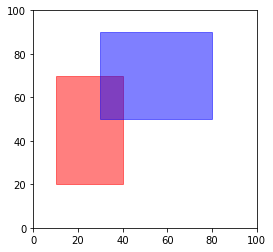

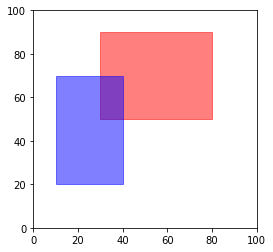

(0.060606, 0.060606)

In [4]:
draw_boxes((10, 20, 30, 50), (30, 50, 50, 40))
draw_boxes((30, 50, 50, 40), (10, 20, 30, 50))

assert iou((10, 20, 30, 50), (30, 50, 50, 40)) == \
          round((40-30)*(70-50)/(30*50+50*40 - (40-30)*(70-50)),6)

assert iou((30, 50, 50, 40), (10, 20, 30, 50)) == \
          round((40-30)*(70-50)/(30*50+50*40 - (40-30)*(70-50)),6)

iou((30, 50, 50, 40), (10, 20, 30, 50)), iou((10, 20, 30, 50), (30, 50, 50, 40))

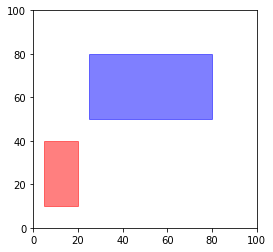

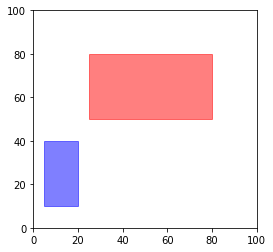

In [5]:
draw_boxes((5, 10, 15, 30), (25, 50, 55, 30))
draw_boxes((25, 50, 55, 30), (5, 10, 15, 30))

assert iou((25, 50, 55, 30), (5, 10, 15, 30)) == 0.0
assert iou((5, 10, 15, 30), (25, 50, 55, 30)) == 0.0

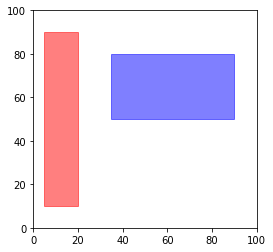

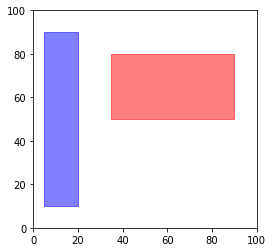

0.0

In [6]:
draw_boxes((5, 10, 15, 80), (35, 50, 55, 30))
draw_boxes((35, 50, 55, 30), (5, 10, 15, 80))
assert iou((5, 10, 15, 80), (35, 50, 55, 30)) == 0.0
assert iou((35, 50, 55, 30), (5, 10, 15, 80)) == 0.0
iou((35, 50, 55, 30), (5, 10, 15, 80))

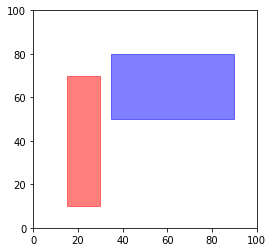

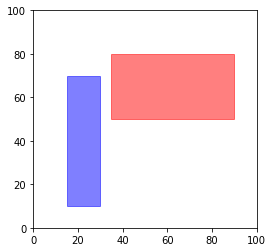

0.0

In [7]:
draw_boxes((15, 10, 15, 60), (35, 50, 55, 30))
draw_boxes((35, 50, 55, 30), (15, 10, 15, 60))
assert iou((35, 50, 55, 30), (15, 10, 15, 60)) == 0.0
iou((35, 50, 55, 30), (15, 10, 15, 60))

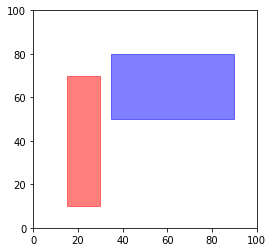

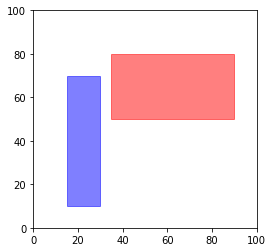

In [8]:
draw_boxes((15, 10, 15, 60), (35, 50, 55, 30))
draw_boxes((35, 50, 55, 30), (15, 10, 15, 60))


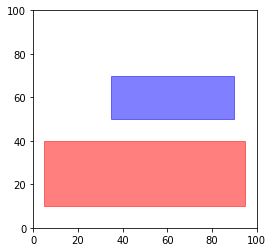

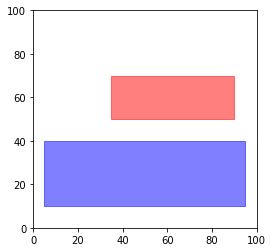

In [9]:
draw_boxes((5, 10, 90, 30), (35, 50, 55, 20))
draw_boxes((35, 50, 55, 20), (5, 10, 90, 30))
assert iou((35, 50, 55, 20), (5, 10, 90, 30)) == 0.0

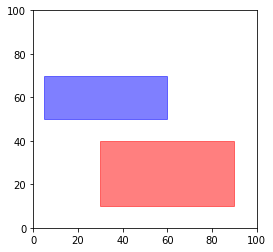

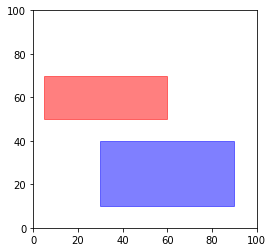

In [10]:
draw_boxes((30, 10, 60, 30), (5, 50, 55, 20))
draw_boxes((5, 50, 55, 20), (30, 10, 60, 30))

assert iou((30, 10, 60, 30), (5, 50, 55, 20)) == 0.0


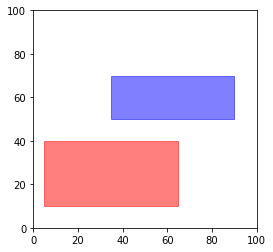

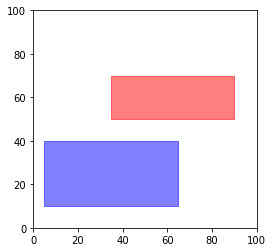

In [11]:
draw_boxes((5, 10, 60, 30), (35, 50, 55, 20))
draw_boxes((35, 50, 55, 20), (5, 10, 60, 30))


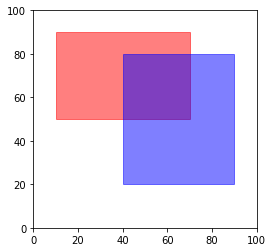

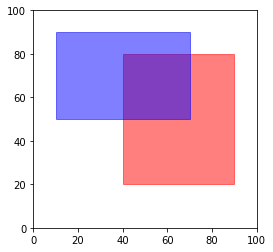

(0.2, 0.2)

In [12]:
draw_boxes((10, 50, 60, 40), (40, 20, 50, 60))
draw_boxes((40, 20, 50, 60), (10, 50, 60, 40))

assert iou((10, 50, 60, 40), (40, 20, 50, 60)) ==\
          (70-40)*(80-50)/((60*40 + 50*60) - (70-40)*(80-50))

assert iou((40, 20, 50, 60), (10, 50, 60, 40)) ==\
          (70-40)*(80-50)/((60*40 + 50*60) - (70-40)*(80-50))

iou((10, 50, 60, 40), (40, 20, 50, 60)), (70-40)*(80-50)/((60*40 + 50*60) - (70-40)*(80-50))

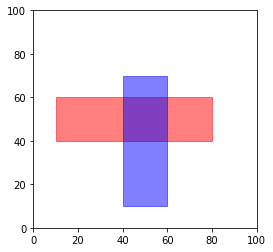

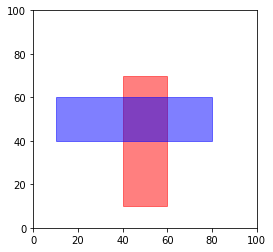

(0.181818, 0.18181818181818182)

In [13]:
draw_boxes((10,40, 70, 20), (40,10, 20, 60))
draw_boxes((40,10, 20, 60), (10,40, 70, 20))

assert iou((10,40, 70, 20), (40,10, 20, 60)) ==\
             round(20*20 / (70*20+20*60 - 20*20),6)
assert iou((40,10, 20, 60), (10,40, 70, 20)) ==\
             round(20*20 / (70*20+20*60 - 20*20),6)
iou((40,10, 20, 60), (10,40, 70, 20)), 20*20 / (70*20+20*60 - 20*20)

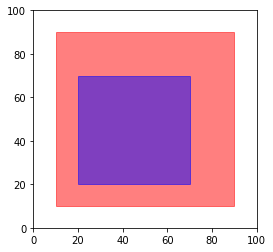

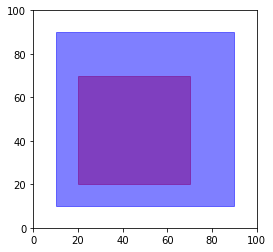

(0.390625, 0.390625)

In [14]:
draw_boxes((10, 10, 80, 80), (20, 20, 50, 50))
draw_boxes((20, 20, 50, 50), (10, 10, 80, 80))

assert iou((10, 10, 80, 80), (20, 20, 50, 50)) ==\
                50*50/(80*80)

assert iou((20, 20, 50, 50), (10, 10, 80, 80)) ==\
                50*50/(80*80)

iou((20, 20, 50, 50), (10, 10, 80, 80)), 50*50/(80*80)

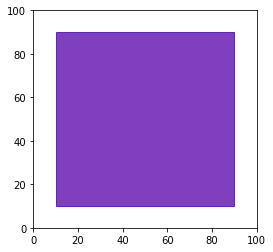

1.0

In [15]:
draw_boxes((10, 10, 80, 80), (10, 10, 80, 80))
assert iou((10, 10, 80, 80), (10, 10, 80, 80)) == 1.0

iou((10, 10, 80, 80), (10, 10, 80, 80))


In [16]:
assert iou((10, 30, 80, 0), (10, 10, 80, 80)) is None

In [17]:
iou((10, 30, 80, 0), (10, 10, 80, 80)) == None

True

In [18]:
%%time
for _ in range(100000000):
    iou((20, 20, 50, 50), (10, 10, 80, 80))

Wall time: 48.4 s
